# **Εργασία 1 - Μετρήσεις Δικτύων & Παραγωγή Δικτύων**

Μελετήστε τα δίκτυα:

1.   Στιγμιότυπο δικτύου ομότιμων (Gnutella) https://snap.stanford.edu/data/p2p-Gnutella05.html
2.   Δίκτυο επιστημονικών συνεργασιών https://snap.stanford.edu/data/ca-GrQc.html

Και παράγετε συνθετικά δίκτυα με 5200 κόμβους χρησιμοποιώντας:


3.   Μοντέλο τυχαίου γράφου (Erdős-Renyi) (μη κατευθυνόμενο γράφο)
4.   Μοντέλο των Watts και Strogatz (μη κατευθυνόμενο γράφο)
5.   Μοντέλο των Barabasi-Albert (μη κατευθυνόμενο γράφο)
6.   Μοντέλο των Barabasi-Albert (κατευθυνόμενο γράφο)

Για την παραγωγή των συνθετικών δικτύων επιλέξτε κατά το δυνατόν παραμέτρους ώστε τα δίκτυα να έχουν αντίστοιχες ιδιότητες με το δίκτυο (2).

Μετρήστε για το καθένα δίκτυο τα παρακάτω:

1.  το πλήθος των διακριτών κόμβων
2.  τους κόμβους με self-loop
3.  το πλήθος των ακμών στο δίκτυο
4.  το πλήθος των ανταποδοτικών (reciprocated) ακμών
5.  το πλήθος των sink και source κόμβων
6.  μέγιστο, ελάχιστο και μέσο βαθμό
7.  μέγιστο, ελάχιστο και μέσο βαθμό εισερχόμενων ακμών (In-degree)
8.  μέγιστο, ελάχιστο και μέσο βαθμό εξερχόμενων ακμών (Out-degree)
9.  τη διάμετρο του δικτύου 
10.  το μέσο clustering coefficient και το global clustering coefficient
11.  το μέγεθος της μεγαλύτερης ισχυρά συνεκτικής συνιστώσας σε πλήθος κόμβων, και ακμών
12.  το μέγεθος της μεγαλύτερης ασθενά συνεκτικής συνιστώσας σε πλήθος, κόμβων, και ακμών

Παρουσιάστε συγκεντρωτικά τα αποτελέσματα σας σε πίνακα.

Επιπλέον σχεδιάστε την κατανομή του βαθμού των κόμβων χρησιμοποιώντας:
13.  απλή κατανομή και γραμμική κλίμακα (linear scale)
14.  απλή κατανομή και λογαριθμική κλίμακα (log-log scale)
15.  κατανομή με χρήση κάδων μεγέθους που αυξάνει εκθετικά (log bininning) σε λογαριθμική κλίμακα

Συγκρίνετε τις ιδιότητες των δικτύων, σχολιάστε τα αποτελέσματα σας και τις επιλογές των
παραμέτρων σας για τα συνθετικά δίκτυα, και με ποιο σκεπτικό καταλήξατε σε αυτές

### ΠΙΝΑΚΕΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ
*Χωρισμός σε 2 πίνακες λόγω χώρου*

#### Πίνακας 1
|Network|Directed|Nodes|Self loop nodes|Edges|Recipr. edges|Sink nodes|Source nodes|Max In-deg|Min In-deg|Avg. In-deg|Max Out-deg|Min Out-deg|Avg Out-deg|Diameter|
|-|:|:|:|:|:|:|:|:|:|:|:|:|:|:|
|Gnutella|Yes|8846|0|31839|0|4996|118|79|0|3.5992539000678274|65|0|3.5992539000678274|9
|ca-GrQc|No|5200|12|14496|0|-|-|-|-|-|-|-|-|17
|Erdős-Renyi|No|5200|0|34494|0|-|-|-|-|-|-|-|-|7
|Watts-Strogatz|No|5200|0|15600|0|-|-|-|-|-|-|-|-|51
|Barabasi-Albert|No|5200|0|15591|0|-|-|-|-|-|-|-|-|7
|Barabasi-Albert|Yes|5200|0|25971|0|67|88|141|0|4.994423076923077|134|0|4.994423076923077|11

#### Πίνακας 2
|Network|Max degree|Min degree|Avg. degree|Nodes in largest WCC|Edges in largest WCC|Nodes in largest SCC|Edges in largest SCC|Avg. clustering coefficient|Global clustering coefficient|
|-|:|:|:|:|:|:|:|:|:|
|Gnutella|88|1|7.198507800135655|8842|31837|3234|13453|0.003600532835551549|0.0037461513333935685
|ca-GrQc|81|1|5.530713468141931|4158|13428|4158|13428|0.529635811052136|0.6298424741263426
|Erdős-Renyi|31|3|13.266923076923076|5200|34494|5200|34494|0.002540309878864948|0.002542589465728559
|Watts-Strogatz|8|4|6|5200|15600|5200|15600|0.5829354395603922|0.5809844287779725
|Barabasi-Albert (undir.)|234|3|5.996538461538462|5200|15591|5200|15591|0.008606241978690669|0.0048976619634495825
|Barabasi-Albert (dir.)|275|5|9.988846153846154|5200|25971|5037|25094|0.005394086918867991|0.003895565408716704

### Libraries and global variables

In [113]:
# importing the networkx library
import networkx as nx

# importing the matplotlib library for plotting the graph
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# import random
import random

# set seed
seed = 10

### p2p-Gnutella05.txt graph

In [164]:
Gnutella = nx.read_edgelist('p2p-Gnutella05.txt', comments='#', create_using=nx.DiGraph(), delimiter='	', nodetype=int, encoding='utf-8')

In [165]:
N = len(Gnutella)
L = Gnutella.size()
degrees = [Gnutella.degree(node) for node in Gnutella]
kmin = min(degrees)
kmax = max(degrees)

print ("Number of nodes:", N)
print ("Nodes with self-loop:", len(list(nx.nodes_with_selfloops(Gnutella))))
print ("Number of edges:", L)
print ("Number of reciprocated edges:", nx.reciprocity(Gnutella))

degrees = [Gnutella.degree(node) for node in Gnutella]
kmin = min(degrees)
kmax = max(degrees)

print ("Max degree:", kmax)
print ("Min degree:", kmin)
print ("Average degree:", 2*L/N)

# shortest_paths = dict(nx.shortest_path_length(Gnutella))
# longest_shortest_path = max([max(val.values()) for val in shortest_paths.values()])
# print ("Diameter (longest shortest path): ", longest_shortest_path)

print("Average clustering coefficient: ", nx.average_clustering(Gnutella))
print("Global clustering coefficient: ", nx.transitivity(Gnutella))

wcc = list(nx.weakly_connected_components(Gnutella))
max_wcc_len = len(max(wcc, key=len))
max_wcc_edges = 0
for component in wcc:
    component_edges = Gnutella.subgraph(component).size()
    if component_edges > max_wcc_edges:
        max_wcc_edges = component_edges
print ("Nodes in largest WCC: ", max_wcc_len, "(", max_wcc_len/N, ")")
print ("Edges in largest WCC: ", max_wcc_edges, "(", max_wcc_edges/L, ")")

scc = list(nx.strongly_connected_components(Gnutella))
max_scc_len = len(max(scc, key=len))
max_scc_edges = 0
for component in scc:
    component_edges = Gnutella.subgraph(component).size()
    if component_edges > max_scc_edges:
        max_scc_edges = component_edges
print ("Nodes in largest SCC: ", max_scc_len, "(", max_scc_len/N, ")")
print ("Edges in largest SCC: ", max_scc_edges, "(", max_scc_edges/L, ")")

# Find sink nodes
sink_nodes = [n for n in Gnutella.nodes() if len(list(Gnutella.successors(n))) == 0]

# Find source nodes
source_nodes = [n for n in Gnutella.nodes() if len(list(Gnutella.predecessors(n))) == 0]

print("Sink nodes:", len(sink_nodes))
print("Source nodes:", len(source_nodes))

# Find max, min, and average in-degree
in_degrees = [d for n, d in Gnutella.in_degree()]
max_in_degree = max(in_degrees)
min_in_degree = min(in_degrees)
avg_in_degree = np.average(in_degrees)

# Find max, min, and average out-degree
out_degrees = [d for n, d in Gnutella.out_degree()]
max_out_degree = max(out_degrees)
min_out_degree = min(out_degrees)
avg_out_degree = np.average(out_degrees)

print("Max in-degree:", max_in_degree)
print("Min in-degree:", min_in_degree)
print("Avg in-degree:", avg_in_degree)
print("Max out-degree:", max_out_degree)
print("Min out-degree:", min_out_degree)
print("Avg out-degree:", avg_out_degree)

Number of nodes: 8846
Nodes with self-loop: 0
Number of edges: 31839
Number of reciprocated edges: 0.0
Max degree: 88
Min degree: 1
Average degree: 7.198507800135655
Average clustering coefficient:  0.003600532835551549
Global clustering coefficient:  0.0037461513333935685
Nodes in largest WCC:  8842 ( 0.9995478182229256 )
Edges in largest WCC:  31837 ( 0.9999371839567825 )
Nodes in largest SCC:  3234 ( 0.36558896676463937 )
Edges in largest SCC:  13453 ( 0.4225321147020949 )
Sink nodes: 4996
Source nodes: 118
Max in-degree: 79
Min in-degree: 0
Avg in-degree: 3.5992539000678274
Max out-degree: 65
Min out-degree: 0
Avg out-degree: 3.5992539000678274


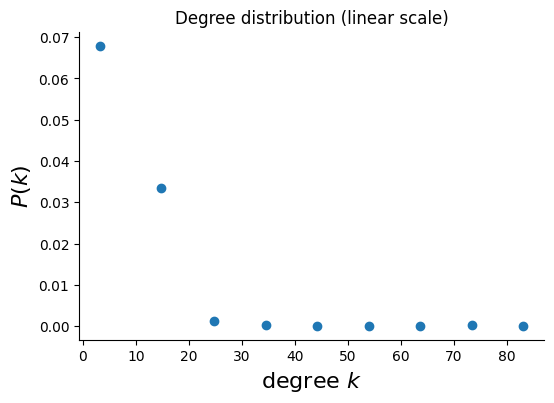

In [181]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (linear scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

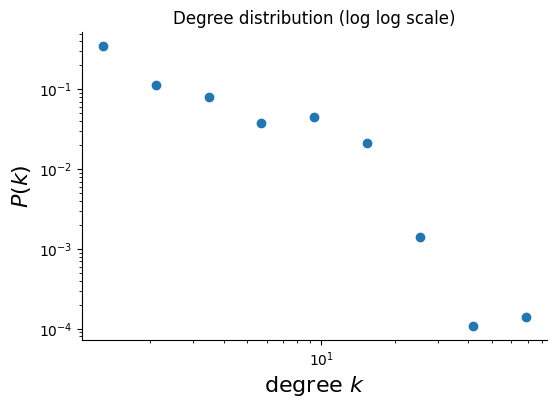

In [180]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (log log scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

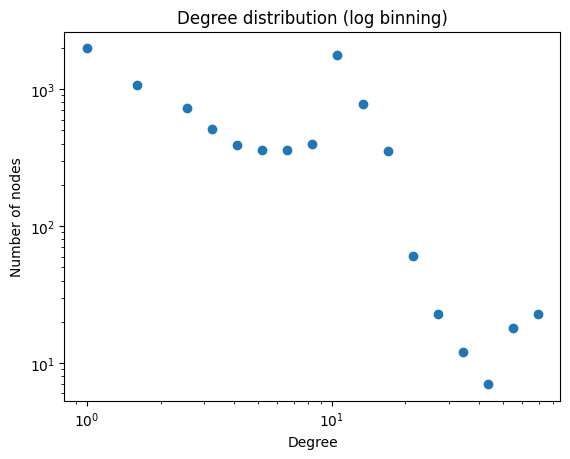

In [179]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in Gnutella.degree()], reverse=True)

# Create log-spaced bins for degree values
bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=20)

# Count number of nodes in each bin
hist, _ = np.histogram(degree_sequence, bins=bins)

# Plot degree distribution with log binning
plt.loglog(bins[:-1], hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution (log binning)')
plt.show()

### CA-GrQc.txt graph

In [182]:
G = nx.read_edgelist('CA-GrQc.txt', comments='#', create_using=nx.Graph(), delimiter='	', nodetype=int, encoding='utf-8')

In [183]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

print ("Number of nodes:", N)
print ("Nodes with self-loop:", len(list(nx.nodes_with_selfloops(G))))
print ("Number of edges:", L)
print ("Number of reciprocated edges:", nx.reciprocity(G))

degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

print ("Max degree:", kmax)
print ("Min degree:", kmin)
print ("Average degree:", 2*L/N)

# shortest_paths = dict(nx.shortest_path_length(G))
# longest_shortest_path = max([max(val.values()) for val in shortest_paths.values()])
# print ("Diameter (longest shortest path): ", longest_shortest_path)

print("Average clustering coefficient: ", nx.average_clustering(G))
print("Global clustering coefficient: ", nx.transitivity(G))

wcc = list(nx.connected_components(G))
max_wcc_len = len(max(wcc, key=len))
max_wcc_edges = 0
for component in wcc:
    component_edges = G.subgraph(component).size()
    if component_edges > max_wcc_edges:
        max_wcc_edges = component_edges
print ("Nodes in largest WCC/SCC: ", max_wcc_len, "(", max_wcc_len/N, ")")
print ("Edges in largest WCC/SCC: ", max_wcc_edges, "(", max_wcc_edges/L, ")")

Number of nodes: 5242
Nodes with self-loop: 12
Number of edges: 14496
Number of reciprocated edges: 0.0
Max degree: 81
Min degree: 1
Average degree: 5.530713468141931
Average clustering coefficient:  0.529635811052136
Global clustering coefficient:  0.6298424741263426
Nodes in largest WCC/SCC:  4158 ( 0.7932086989698588 )
Edges in largest WCC/SCC:  13428 ( 0.9263245033112583 )


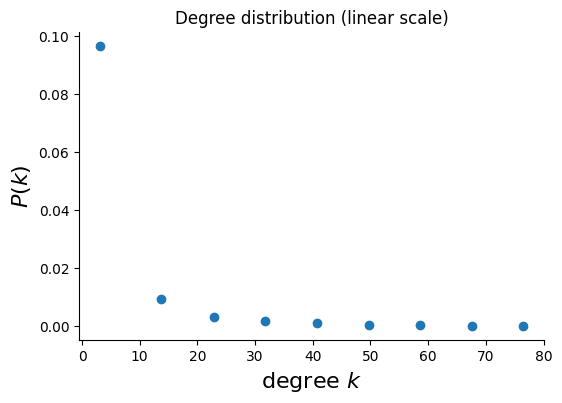

In [184]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (linear scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


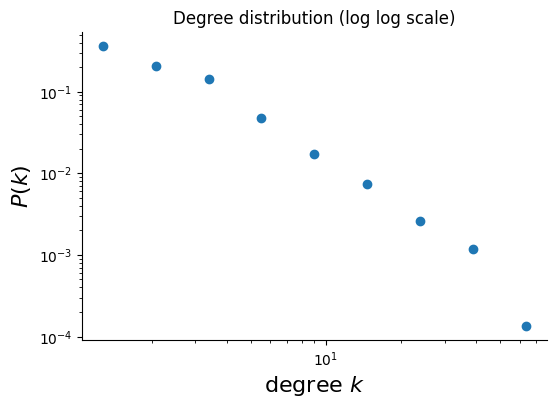

In [185]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (log log scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


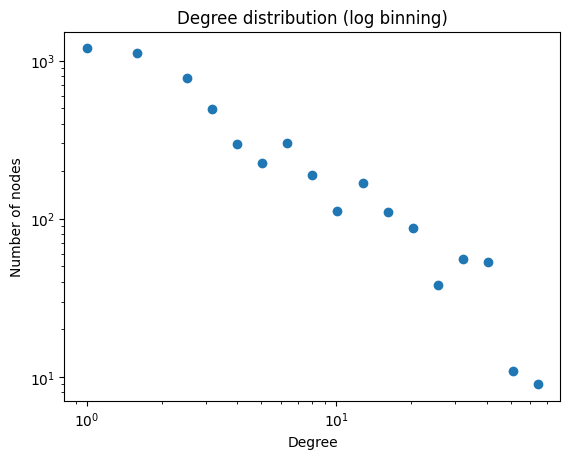

In [186]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Create log-spaced bins for degree values
bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=20)

# Count number of nodes in each bin
hist, _ = np.histogram(degree_sequence, bins=bins)

# Plot degree distribution with log binning
plt.loglog(bins[:-1], hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution (log binning)')
plt.show()

### Erdős-Renyi model (undirected graph)

In [191]:
G1 = nx.erdos_renyi_graph(5200, 0.00255, seed)

N = len(G1)
L = G1.size()
degrees = [G1.degree(node) for node in G1]
kmin = min(degrees)
kmax = max(degrees)

print ("Number of nodes:", N)
print ("Nodes with self-loop:", len(list(nx.nodes_with_selfloops(G1))))
print ("Number of edges:", L)
print ("Number of reciprocated edges:", nx.reciprocity(G1))

degrees = [G1.degree(node) for node in G1]
kmin = min(degrees)
kmax = max(degrees)

print ("Max degree:", kmax)
print ("Min degree:", kmin)
print ("Average degree:", 2*L/N)

# shortest_paths = dict(nx.shortest_path_length(G1))
# longest_shortest_path = max([max(val.values()) for val in shortest_paths.values()])
# print ("Diameter (longest shortest path): ", longest_shortest_path)

print("Average clustering coefficient: ", nx.average_clustering(G1))
print("Global clustering coefficient: ", nx.transitivity(G1))

wcc = list(nx.connected_components(G1))
max_wcc_len = len(max(wcc, key=len))
max_wcc_edges = 0
for component in wcc:
    component_edges = G1.subgraph(component).size()
    if component_edges > max_wcc_edges:
        max_wcc_edges = component_edges
print ("Nodes in largest WCC/SCC: ", max_wcc_len, "(", max_wcc_len/N, ")")
print ("Edges in largest WCC/SCC: ", max_wcc_edges, "(", max_wcc_edges/L, ")")

Number of nodes: 5200
Nodes with self-loop: 0
Number of edges: 34494
Number of reciprocated edges: 0.0
Max degree: 31
Min degree: 3
Average degree: 13.266923076923076
Average clustering coefficient:  0.002540309878864948
Global clustering coefficient:  0.002542589465728559
Nodes in largest WCC/SCC:  5200 ( 1.0 )
Edges in largest WCC/SCC:  34494 ( 1.0 )


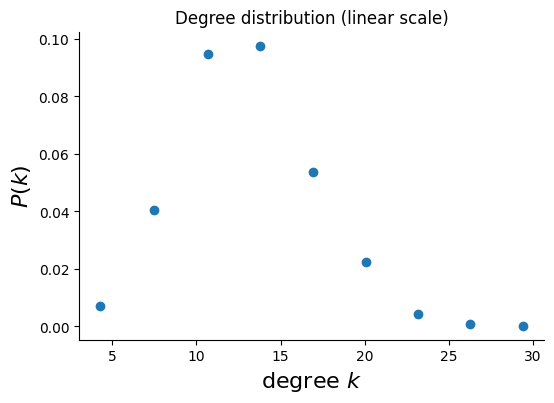

In [192]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (linear scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


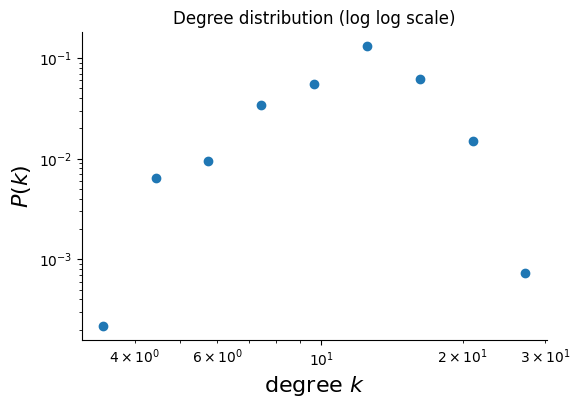

In [193]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (log log scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


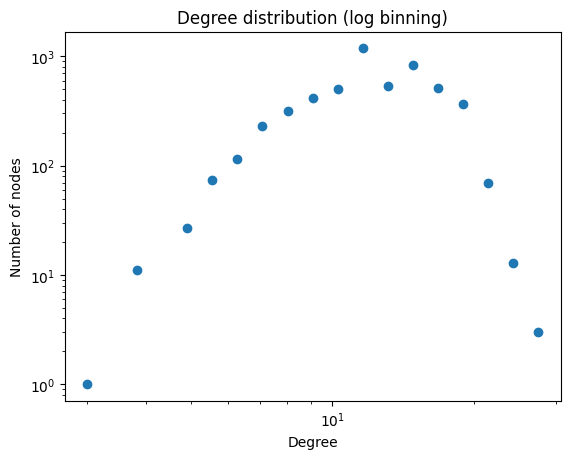

In [194]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)

# Create log-spaced bins for degree values
bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=20)

# Count number of nodes in each bin
hist, _ = np.histogram(degree_sequence, bins=bins)

# Plot degree distribution with log binning
plt.loglog(bins[:-1], hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution (log binning)')
plt.show()

### Watts-Strogatz model (undirected graph)

In [195]:
G2 = nx.watts_strogatz_graph(5200, 7, 0.01, seed)

N = len(G2)
L = G2.size()
degrees = [G2.degree(node) for node in G2]
kmin = min(degrees)
kmax = max(degrees)

print ("Number of nodes:", N)
print ("Nodes with self-loop:", len(list(nx.nodes_with_selfloops(G2))))
print ("Number of edges:", L)
print ("Number of reciprocated edges:", nx.reciprocity(G2))

degrees = [G2.degree(node) for node in G2]
kmin = min(degrees)
kmax = max(degrees)

print ("Max degree:", kmax)
print ("Min degree:", kmin)
print ("Average degree:", 2*L/N)

# shortest_paths = dict(nx.shortest_path_length(G2))
# longest_shortest_path = max([max(val.values()) for val in shortest_paths.values()])
# print ("Diameter (longest shortest path): ", longest_shortest_path)

print("Average clustering coefficient: ", nx.average_clustering(G2))
print("Global clustering coefficient: ", nx.transitivity(G2))

wcc = list(nx.connected_components(G2))
max_wcc_len = len(max(wcc, key=len))
max_wcc_edges = 0
for component in wcc:
    component_edges = G2.subgraph(component).size()
    if component_edges > max_wcc_edges:
        max_wcc_edges = component_edges
print ("Nodes in largest WCC: ", max_wcc_len, "(", max_wcc_len/N, ")")
print ("Edges in largest WCC: ", max_wcc_edges, "(", max_wcc_edges/L, ")")

Number of nodes: 5200
Nodes with self-loop: 0
Number of edges: 15600
Number of reciprocated edges: 0.0
Max degree: 8
Min degree: 4
Average degree: 6.0
Average clustering coefficient:  0.5829354395603922
Global clustering coefficient:  0.5809844287779725
Nodes in largest WCC:  5200 ( 1.0 )
Edges in largest WCC:  15600 ( 1.0 )


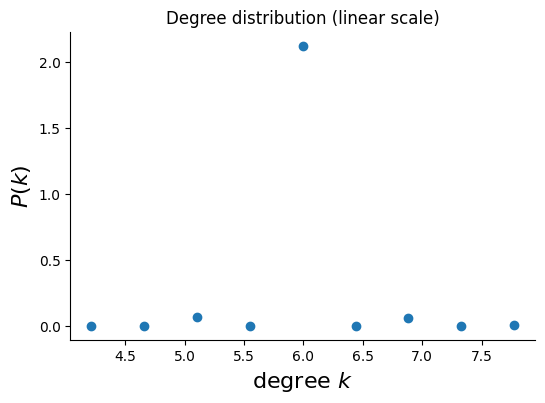

In [196]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (linear scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


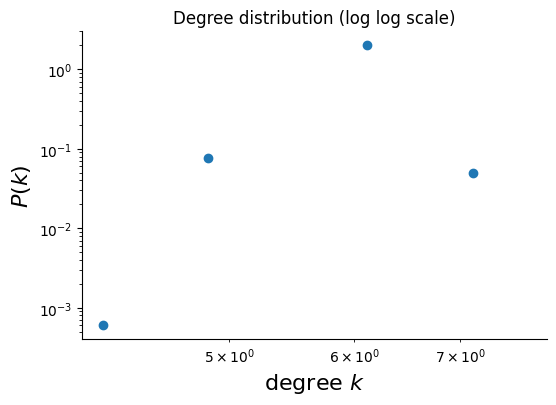

In [197]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (log log scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


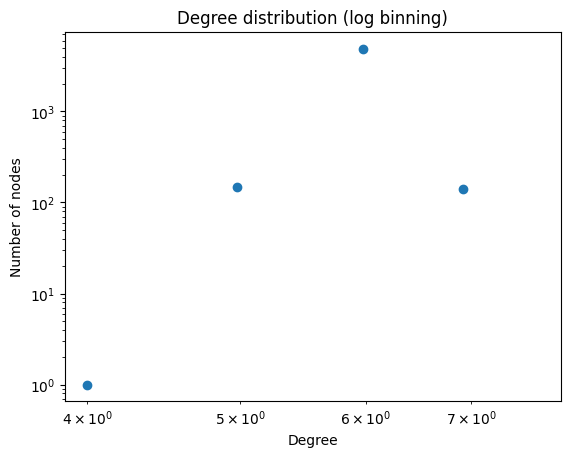

In [198]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)

# Create log-spaced bins for degree values
bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=20)

# Count number of nodes in each bin
hist, _ = np.histogram(degree_sequence, bins=bins)

# Plot degree distribution with log binning
plt.loglog(bins[:-1], hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution (log binning)')
plt.show()

### Barabasi-Albert model (undirected graph)

In [199]:
G3 = nx.barabasi_albert_graph(5200, 3, seed)

N = len(G3)
L = G3.size()
degrees = [G3.degree(node) for node in G3]
kmin = min(degrees)
kmax = max(degrees)

print ("Number of nodes:", N)
print ("Nodes with self-loop:", len(list(nx.nodes_with_selfloops(G3))))
print ("Number of edges:", L)
print ("Number of reciprocated edges:", nx.reciprocity(G3))

degrees = [G3.degree(node) for node in G3]
kmin = min(degrees)
kmax = max(degrees)

print ("Max degree:", kmax)
print ("Min degree:", kmin)
print ("Average degree:", 2*L/N)

# shortest_paths = dict(nx.shortest_path_length(G3))
# longest_shortest_path = max([max(val.values()) for val in shortest_paths.values()])
# print ("Diameter (longest shortest path): ", longest_shortest_path)

print("Average clustering coefficient: ", nx.average_clustering(G3))
print("Global clustering coefficient: ", nx.transitivity(G3))

wcc = list(nx.connected_components(G3))
max_wcc_len = len(max(wcc, key=len))
max_wcc_edges = 0
for component in wcc:
    component_edges = G3.subgraph(component).size()
    if component_edges > max_wcc_edges:
        max_wcc_edges = component_edges
print ("Nodes in largest WCC/SCC: ", max_wcc_len, "(", max_wcc_len/N, ")")
print ("Edges in largest WCC/SCC: ", max_wcc_edges, "(", max_wcc_edges/L, ")")

Number of nodes: 5200
Nodes with self-loop: 0
Number of edges: 15591
Number of reciprocated edges: 0.0
Max degree: 234
Min degree: 3
Average degree: 5.996538461538462
Average clustering coefficient:  0.008606241978690669
Global clustering coefficient:  0.0048976619634495825
Nodes in largest WCC/SCC:  5200 ( 1.0 )
Edges in largest WCC/SCC:  15591 ( 1.0 )


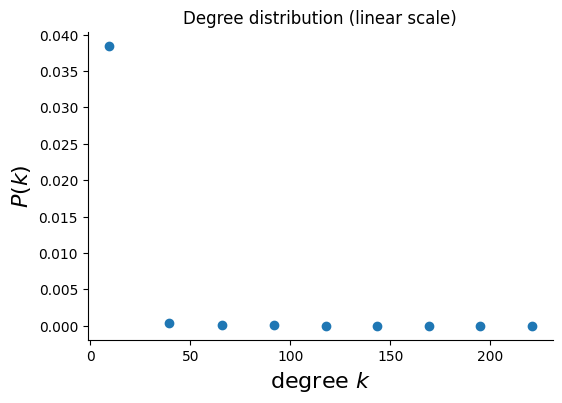

In [200]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (linear scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


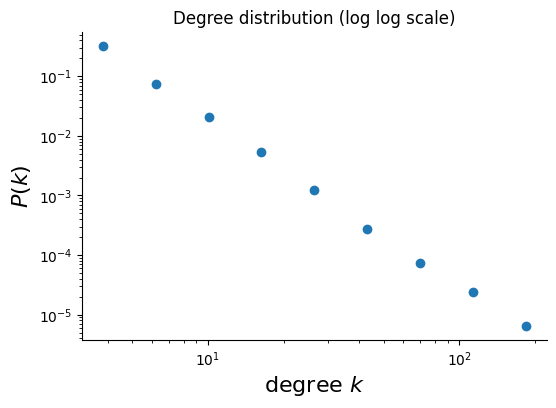

In [201]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (log log scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


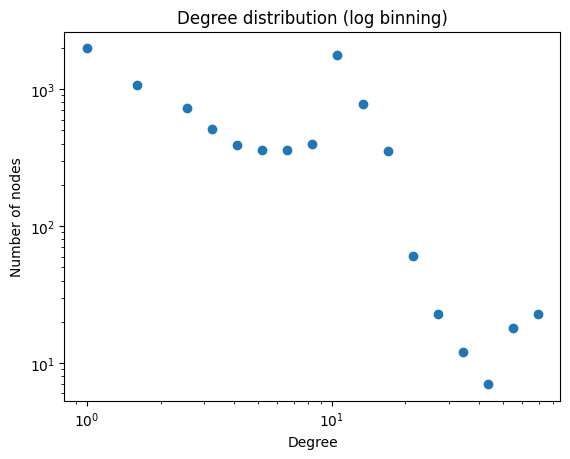

In [202]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in Gnutella.degree()], reverse=True)

# Create log-spaced bins for degree values
bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=20)

# Count number of nodes in each bin
hist, _ = np.histogram(degree_sequence, bins=bins)

# Plot degree distribution with log binning
plt.loglog(bins[:-1], hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution (log binning)')
plt.show()

### Barabasi-Albert model (directed graph)

In [203]:
# Generate undirected graph
G_undirected = nx.barabasi_albert_graph(5200, 5, seed)

# Convert to directed graph
G4 = nx.DiGraph(G_undirected)

# Randomly assign a direction to each edge
edges_to_modify = []
for (u, v) in G4.edges():
    if random.random() < 0.5:
        edges_to_modify.append((u, v))
    else:
        edges_to_modify.append((v, u))

for (u, v) in edges_to_modify:
    if G4.has_edge(u, v):
        G4.remove_edge(u, v)
    if not G.has_edge(v, u):
        G4.add_edge(v, u)


N = len(G4)
L = G4.size()
degrees = [G4.degree(node) for node in G4]
kmin = min(degrees)
kmax = max(degrees)

print ("Number of nodes:", N)
print ("Nodes with self-loop:", len(list(nx.nodes_with_selfloops(G4))))
print ("Number of edges:", L)
print ("Number of reciprocated edges:", nx.reciprocity(G4))

degrees = [G4.degree(node) for node in G4]
kmin = min(degrees)
kmax = max(degrees)

print ("Max degree:", kmax)
print ("Min degree:", kmin)
print ("Average degree:", 2*L/N)

# shortest_paths = dict(nx.shortest_path_length(G4))
# longest_shortest_path = max([max(val.values()) for val in shortest_paths.values()])
# print ("Diameter (longest shortest path): ", longest_shortest_path)

print("Average clustering coefficient: ", nx.average_clustering(G4))
print("Global clustering coefficient: ", nx.transitivity(G4))

wcc = list(nx.weakly_connected_components(G4))
max_wcc_len = len(max(wcc, key=len))
max_wcc_edges = 0
for component in wcc:
    component_edges = G4.subgraph(component).size()
    if component_edges > max_wcc_edges:
        max_wcc_edges = component_edges
print ("Nodes in largest WCC: ", max_wcc_len, "(", max_wcc_len/N, ")")
print ("Edges in largest WCC: ", max_wcc_edges, "(", max_wcc_edges/L, ")")

scc = list(nx.strongly_connected_components(G4))
max_scc_len = len(max(scc, key=len))
max_scc_edges = 0
for component in scc:
    component_edges = G4.subgraph(component).size()
    if component_edges > max_scc_edges:
        max_scc_edges = component_edges
print ("Nodes in largest SCC: ", max_scc_len, "(", max_scc_len/N, ")")
print ("Edges in largest SCC: ", max_scc_edges, "(", max_scc_edges/L, ")")

# Find sink nodes
sink_nodes = [n for n in G4.nodes() if len(list(G4.successors(n))) == 0]

# Find source nodes
source_nodes = [n for n in G4.nodes() if len(list(G4.predecessors(n))) == 0]

print("Sink nodes:", len(sink_nodes))
print("Source nodes:", len(source_nodes))

# Find max, min, and average in-degree
in_degrees = [d for n, d in G4.in_degree()]
max_in_degree = max(in_degrees)
min_in_degree = min(in_degrees)
avg_in_degree = np.average(in_degrees)

# Find max, min, and average out-degree
out_degrees = [d for n, d in G4.out_degree()]
max_out_degree = max(out_degrees)
min_out_degree = min(out_degrees)
avg_out_degree = np.average(out_degrees)

print("Max in-degree:", max_in_degree)
print("Min in-degree:", min_in_degree)
print("Avg in-degree:", avg_in_degree)
print("Max out-degree:", max_out_degree)
print("Min out-degree:", min_out_degree)
print("Avg out-degree:", avg_out_degree)

Number of nodes: 5200
Nodes with self-loop: 0
Number of edges: 25975
Number of reciprocated edges: 0.0
Max degree: 276
Min degree: 5
Average degree: 9.990384615384615
Average clustering coefficient:  0.005410779917784495
Global clustering coefficient:  0.00417256588978436
Nodes in largest WCC:  5200 ( 1.0 )
Edges in largest WCC:  25975 ( 1.0 )
Nodes in largest SCC:  5043 ( 0.9698076923076923 )
Edges in largest SCC:  25136 ( 0.9676997112608278 )
Sink nodes: 77
Source nodes: 74
Max in-degree: 134
Min in-degree: 0
Avg in-degree: 4.9951923076923075
Max out-degree: 142
Min out-degree: 0
Avg out-degree: 4.9951923076923075


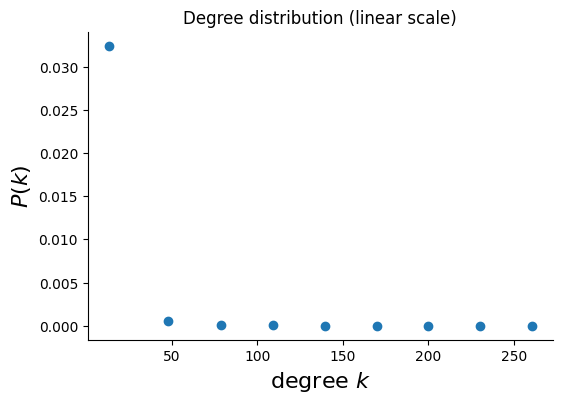

In [204]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (linear scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


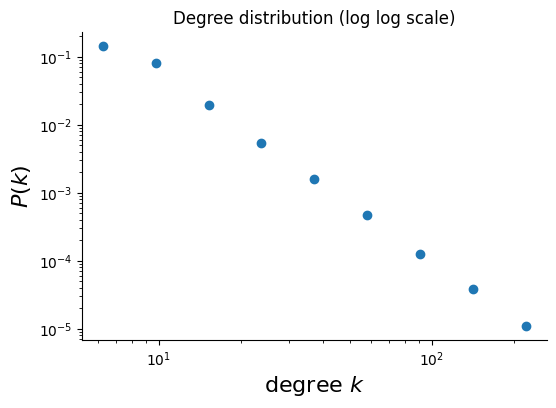

In [205]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.title("Degree distribution (log log scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()


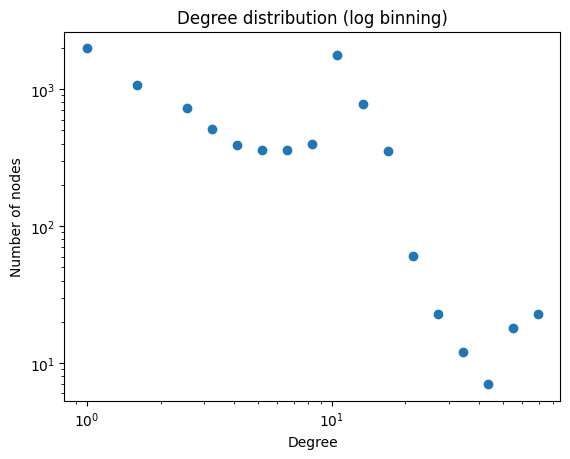

In [206]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in Gnutella.degree()], reverse=True)

# Create log-spaced bins for degree values
bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=20)

# Count number of nodes in each bin
hist, _ = np.histogram(degree_sequence, bins=bins)

# Plot degree distribution with log binning
plt.loglog(bins[:-1], hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution (log binning)')
plt.show()

### Σχολιασμός

Προκειμένου να δημιουργήσω τα 4 συνθετικά δίκτυα, έπαιξα με τις παραμέτρους κάθε συνάρτησης (π.χ. Barabasi-Albert, Watts-Strogatz κ.λπ.) για να δημιουργήσω δίκτυα που θα είχαν παρόμοια χαρακτηριστικά με τo δίκτυo που θέλαμε. Για παράδειγμα, προσάρμοζα παραμέτρους (όπως η πιθανότητα επανασύνδεσης για Watts-Strogatz) για να προσπαθήσω να "ταιριάξω" άλλες μετρικές όπως ο μέσος βαθμός ή ο clustering coefficient.

Ωστόσο, διαπίστωσα ότι μερικές φορές η προσαρμογή μιας παραμέτρου για τη βελτίωση μιας συγκεκριμένης μετρικής προκαλούσε μια άλλη μετρική να γίνει λιγότερο επιθυμητή. Για παράδειγμα, η αύξηση της πιθανότητας επανασύνδεσης στο δίκτυο Watts-Strogatz ώστε να ταιριάζει με τον clustering coefficient του αρχικού δικτύου μπορεί να οδηγήσει σε χαμηλότερο ελάχιστο βαθμό.

Συνολικά, προσπάθησα να επιτύχω μια ισορροπία μεταξύ της προσαρμογής των παραμέτρων ώστε να ταιριάζουν με το αρχικό δίκτυο. Σε ορισμένες περιπτώσεις έπρεπε να κάνω συμβιβασμούς μεταξύ διαφορετικών μετρικών και σε άλλες περιπτώσεις διαπίστωσα ότι ορισμένες μετρικές ήταν λιγότερο ευαίσθητες στις αλλαγές των παραμέτρων από άλλες.